In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis=1)
y = df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Degree: 1, CV RMSE:  1.8180, Train RMSE:  1.7400, Test RMSE:  1.5451, DIF: -0.1949
Degree: 2, CV RMSE:  0.6851, Train RMSE:  0.5969, Test RMSE:  0.6695, DIF:  0.0726
Degree: 3, CV RMSE:  0.6977, Train RMSE:  0.5126, Test RMSE:  0.6944, DIF:  0.1818
Degree: 4, CV RMSE:  0.6938, Train RMSE:  0.5128, Test RMSE:  0.7186, DIF:  0.2058
Degree: 5, CV RMSE:  0.7153, Train RMSE:  0.5129, Test RMSE:  0.7280, DIF:  0.2151
Degree: 6, CV RMSE:  0.6772, Train RMSE:  0.5143, Test RMSE:  0.7048, DIF:  0.1905
Degree: 7, CV RMSE:  0.6849, Train RMSE:  0.5262, Test RMSE:  0.6915, DIF:  0.1652
Degree: 8, CV RMSE:  0.7035, Train RMSE:  0.5382, Test RMSE:  0.7138, DIF:  0.1757
Degree: 9, CV RMSE:  0.7175, Train RMSE:  0.5457, Test RMSE:  0.7335, DIF:  0.1878
Degree: 10, CV RMSE:  0.7674, Train RMSE:  0.5554, Test RMSE:  0.7558, DIF:  0.2004


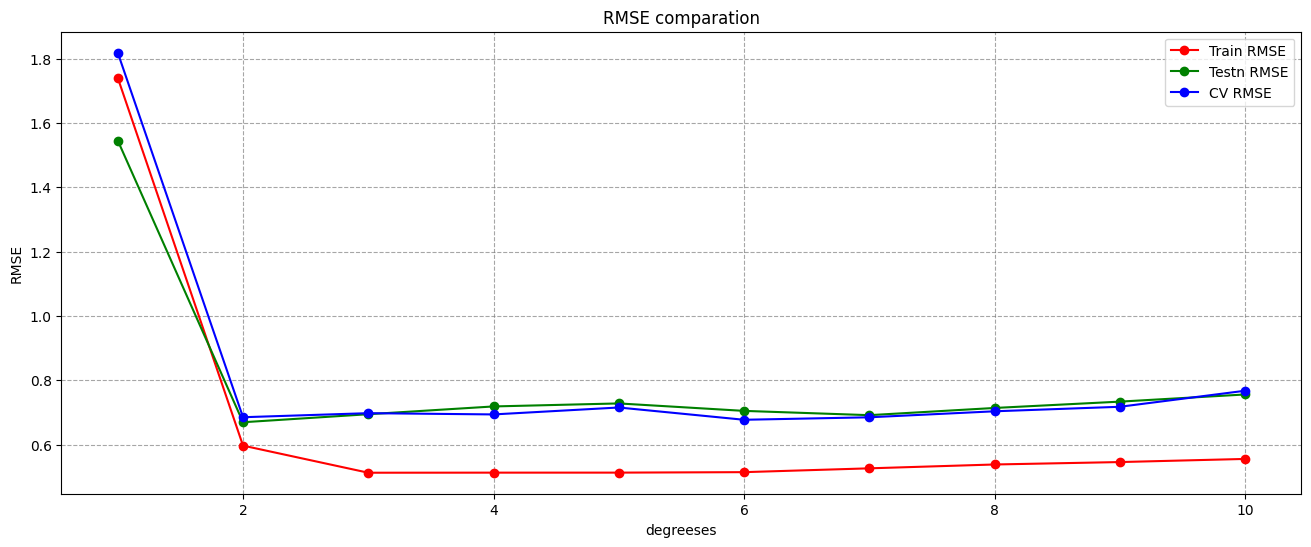

In [6]:
train_rmse_errors = []
test_rmse_errors = []
cv_rmse_errors = []
degreeses = range(1, 11)

for d in degreeses:
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_converter.fit_transform(X_train)
    X_test_poly = poly_converter.transform(X_test)

    scaler = StandardScaler()
    scaler.fit(X_train_poly)
    X_train_scaled = scaler.transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=10, 
                         tol=0.005, random_state=101, alphas=np.logspace(-1, -5, 10), max_iter=1000000)
    model.fit(X_train_scaled, y_train)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_RMSE = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_RMSE = np.sqrt(np.mean(cv_scores))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    cv_rmse_errors.append(cv_RMSE)

    print(f'Degree: {d}, CV RMSE: {cv_RMSE: .4f}, Train RMSE: {train_RMSE: .4f}, Test RMSE: {test_RMSE: .4f}, DIF: {(test_RMSE - train_RMSE): .4f}')

plt.figure(figsize=(16, 6))
plt.plot(degreeses, train_rmse_errors, color='red', label='Train RMSE', marker='o')
plt.plot(degreeses, test_rmse_errors, color='green', label='Testn RMSE', marker='o')
plt.plot(degreeses, cv_rmse_errors, color='blue', label='CV RMSE', marker='o')

plt.title('RMSE comparation')
plt.xlabel('degreeses')
plt.ylabel('RMSE')
plt.grid(True, color='grey', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [40]:
# Подготовка данных для degree=2 на полном наборе
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_converter.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Обучение модели для degree=2
model = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    n_alphas=10,
    tol=0.005,
    random_state=101,
    alphas=np.logspace(-1, -5, 10),
    max_iter=1000000
)

# Обучение на полном наборе
model.fit(X_scaled, y)
test_predictions = model.predict(X_scaled)


# Вывод только параметров модели (опционально)
print(f"Final model (Degree=2), Best alpha: {model.alpha_:.6f}, l1_ratio: {model.l1_ratio_}, Model coef: {model.coef_}")

from joblib import dump, load

# Сохранение модели и трансформеров
dump(model, 'elastic_net_degree_2_model.joblib')
dump(poly_converter, 'poly_converter_degree_2.joblib')
dump(scaler, 'scaler_degree_2.joblib')
print("Model and transformers saved as 'elastic_net_degree_2_model.joblib', 'poly_converter_degree_2.joblib', 'scaler_degree_2.joblib'")

Final model (Degree=2), Best alpha: 0.004642, l1_ratio: 1.0, Model coef: [ 4.01095606  0.23503623  0.15243471 -2.47875054  3.78731513 -0.15963664
  0.11736644  0.0372194   0.        ]
Model and transformers saved as 'elastic_net_degree_2_model.joblib', 'poly_converter_degree_2.joblib', 'scaler_degree_2.joblib'


In [37]:
data = pd.DataFrame({
    'iteration': range(1, len(y) + 1),
    'prediction': test_predictions,
    'test':y
})

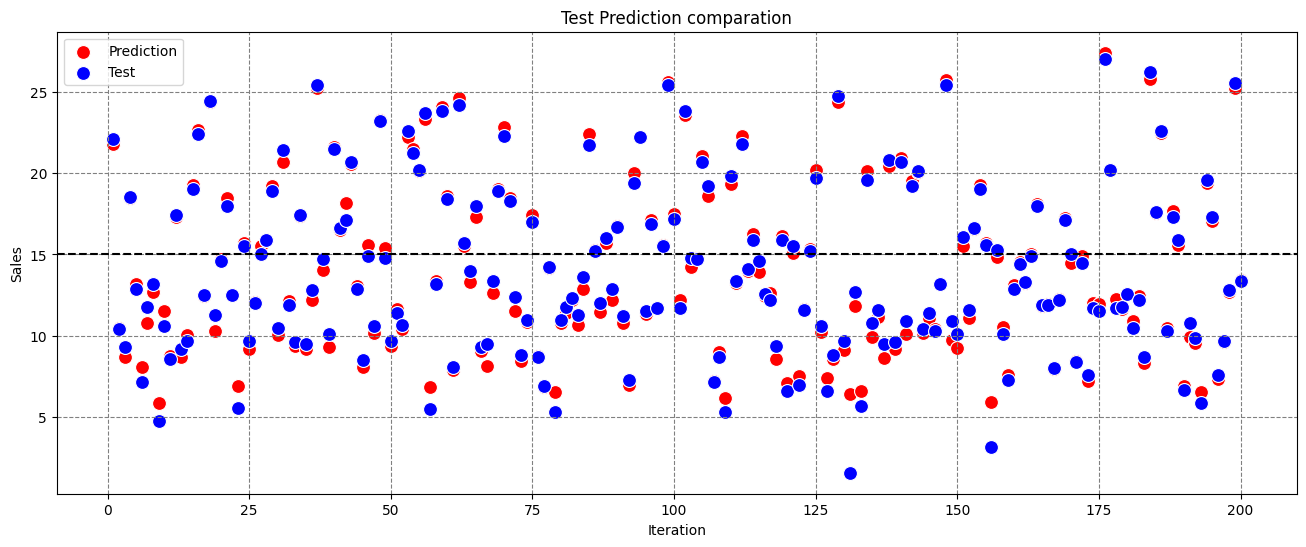

In [38]:
plt.figure(figsize=(16, 6))

sns.scatterplot(x='iteration', y='prediction', data=data, color='red', label='Prediction', s=100)
sns.scatterplot(x='iteration', y='test', data=data, color='blue', label='Test', s=100)
plt.axhline(y=15, color='black', linestyle='--')

plt.title('Test Prediction comparation')
plt.xlabel('Iteration')
plt.ylabel('Sales')
plt.grid(True, color='grey', linestyle='--')
plt.legend()

plt.show()